In [2]:
#aquí cominza el proyecto
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras import layers, models
from keras.layers import InputLayer, Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LSTM, GRU
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler 

In [3]:
#Leemos el archivo (el web-request ejecutarlo directamente en powershell pq no sabemos pq el signo de exclamación no me funciona)
#!Invoke-WebRequest "https://udcgal.sharepoint.com/:u:/s/GCEDAprendizajeAutomaticoII/EW-oyZUCNkBMvy80CvRjlnABDl5jxrGj1JyXG3C2vr2xAA?e=61EuOe&download=1" -OutFile data.json

#Leemos el archivo y lo convierte a dataframe
df = pd.read_json('data.json')
print(df.dtypes)

timestamp inicial     datetime64[ns]
precio inicio                float64
precio mas alto              float64
precio mas bajo              float64
precio fin                   float64
volumen                      float64
timestamp final       datetime64[ns]
volumen en cuotas            float64
numero de compras              int64
volumen de dolares           float64
volumen de euros             float64
dtype: object


In [4]:
##EXPLORACIÓN Y PREPROCESADO DE DATOS 
# print(df.head())
# print(df.isnull().sum()) #no tiene nulos 
# print(df.info())
df.describe() #estadísticas de la columna
#podemos ver como además, gracias al describe que nos muestra la distribución de los datos, que el rango de los valores de las columnas
#parecen estar todas bien (no hay valores nulos, valores negativos en precios o volumenes, ...)
#Igualmente queda todavía pendiente hacer una exporación visual de los datos, para ver si hay algún valor atípico

,timestamp inicial,precio inicio,precio mas alto,precio mas bajo,precio fin,volumen,timestamp final,volumen en cuotas,numero de compras,volumen de dolares,volumen de euros
count,24970,24970.000000,24970.000000,24970.000000,24970.000000,2.497000e+04,24970,2.497000e+04,24970.000000,2.497000e+04,2.497000e+04
mean,2021-06-07 09:52:59.014818048,1.126497,1.127797,1.125329,1.126459,1.588138e+06,2021-06-07 10:52:58.645466880,1.831407e+06,3249.635603,7.412968e+05,8.552054e+05
min,2020-01-03 08:00:00,0.953600,0.955400,0.953500,0.953600,0.000000e+00,2020-01-03 08:59:59.999000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2020-09-19 22:15:00,1.080000,1.082000,1.078000,1.080000,7.440733e+04,2020-09-19 23:14:59.999000064,8.558465e+04,298.000000,3.189642e+04,3.638405e+04
50%,2021-06-07 13:30:00,1.133000,1.134000,1.132000,1.133000,7.911794e+05,2021-06-07 14:29:59.999000064,8.722955e+05,2046.000000,3.359175e+05,3.709915e+05
75%,2022-02-22 21:45:00,1.178800,1.179900,1.177700,1.178700,2.069755e+06,2022-02-22 22:44:59.999000064,2.302447e+06,4215.000000,9.509889e+05,1.063618e+06
max,2022-11-10 00:00:00,1.309800,4.950000,1.269500,1.309800,4.694843e+07,2022-11-10 00:59:59.999000,5.784383e+07,53917.000000,2.354437e+07,2.905002e+07
std,NaN,0.066949,0.071274,0.066925,0.066935,2.435379e+06,NaN,2.898230e+06,4291.602485,1.189478e+06,1.413589e+06


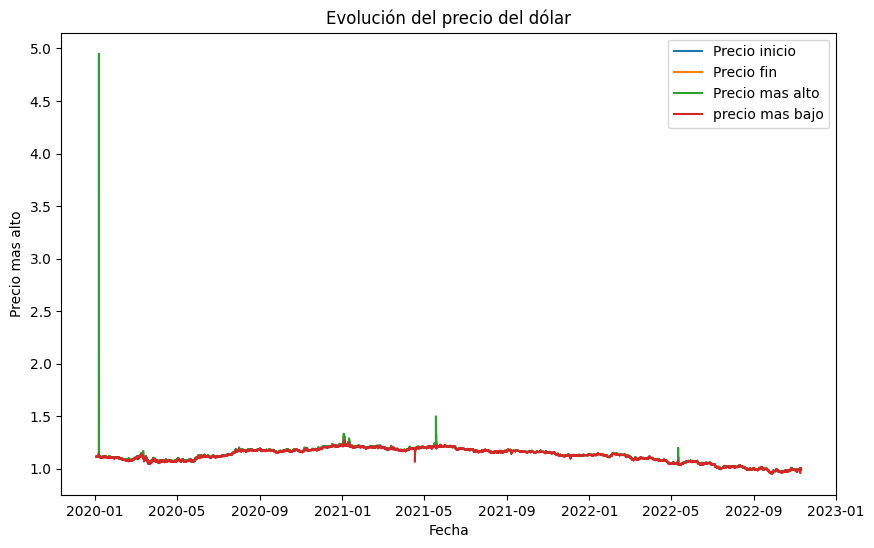

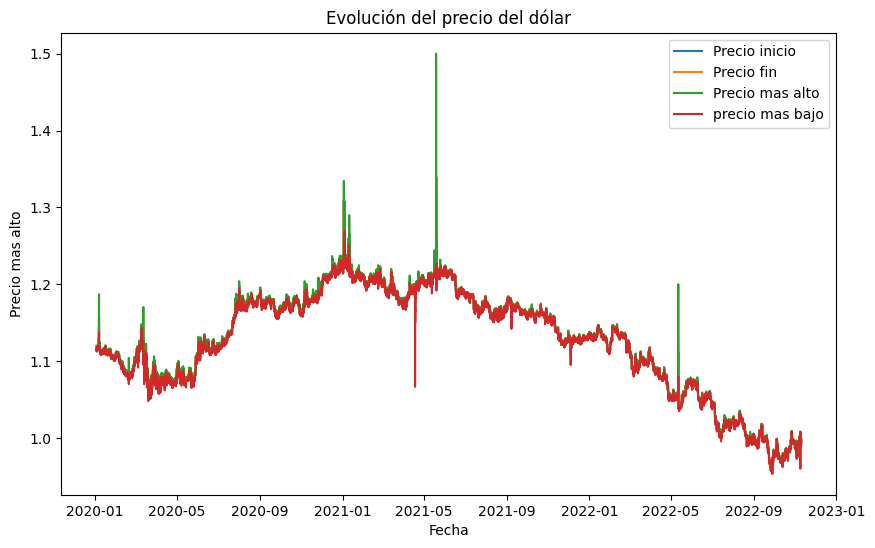

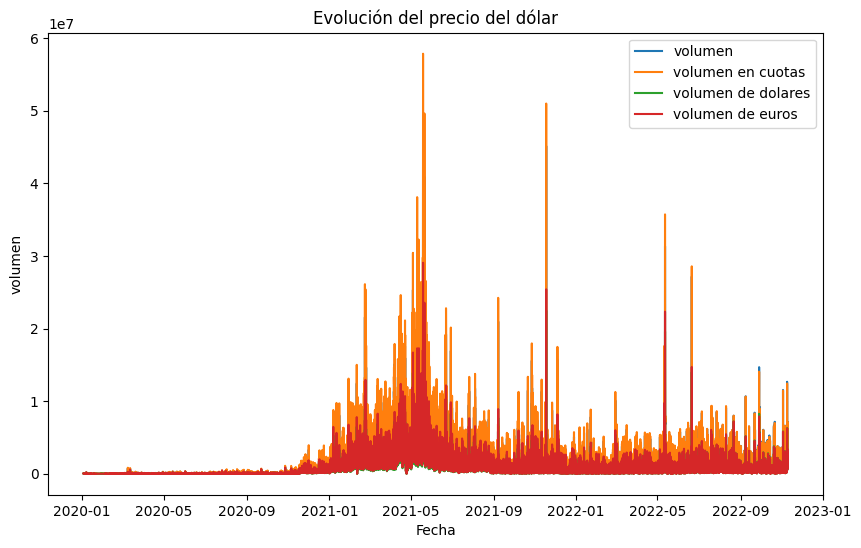

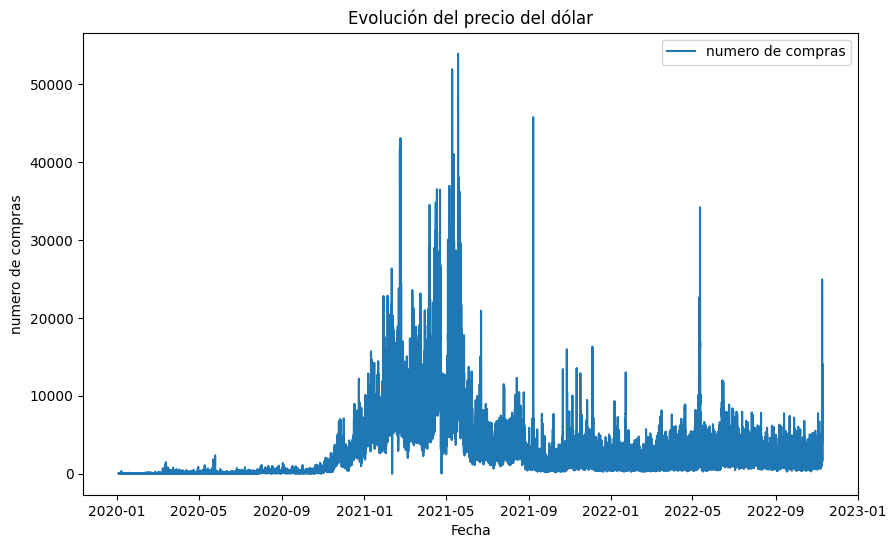

In [5]:

# Visualizar la serie temporal de los precios
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp inicial'], df['precio inicio'], label='Precio inicio')
plt.plot(df['timestamp inicial'], df['precio fin'], label='Precio fin')
plt.plot(df['timestamp inicial'], df['precio mas alto'], label='Precio mas alto')
plt.plot(df['timestamp inicial'], df['precio mas bajo'], label='precio mas bajo')
plt.xlabel('Fecha')
plt.ylabel('Precio mas alto')
plt.title('Evolución del precio del dólar')
plt.legend()
plt.show()

#vamos a quitar un valor atípico en el precio mas alto y cambiarlo por un nulo y dsp con interpolate le daremos otro valor
indice_max = df['precio mas alto'].idxmax()
df.loc[indice_max, 'precio mas alto'] = None
df.interpolate(method='linear', inplace=True)


# Visualizar la serie temporal de los precios
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp inicial'], df['precio inicio'], label='Precio inicio')
plt.plot(df['timestamp inicial'], df['precio fin'], label='Precio fin')
plt.plot(df['timestamp inicial'], df['precio mas alto'], label='Precio mas alto')
plt.plot(df['timestamp inicial'], df['precio mas bajo'], label='precio mas bajo')
plt.xlabel('Fecha')
plt.ylabel('Precio mas alto')
plt.title('Evolución del precio del dólar')
plt.legend()
plt.show()



# Visualizar la serie temporal de los volúmenes
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp inicial'], df['volumen'], label='volumen')
plt.plot(df['timestamp inicial'], df['volumen en cuotas'], label='volumen en cuotas')
plt.plot(df['timestamp inicial'], df['volumen de dolares'], label='volumen de dolares')
plt.plot(df['timestamp inicial'], df['volumen de euros'], label='volumen de euros')
plt.xlabel('Fecha')
plt.ylabel('volumen')
plt.title('Evolución del precio del dólar')
plt.legend()
plt.show()

#aquí decidimos no quitar valores atípicos

#Visualizar la serie temporal con el número de compras
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp inicial'], df['numero de compras'], label='numero de compras')
plt.xlabel('Fecha')
plt.ylabel('numero de compras')
plt.title('Evolución del precio del dólar')
plt.legend()
plt.show()

#aquí decidimos no quitar valores atípicos




In [6]:
###Investigamos sobre discontinuidades
df['duracion_horas'] = (df['timestamp final'] - df['timestamp inicial']).dt.total_seconds() / 3600
print(df['duracion_horas'].describe())

#como podemos ver no hay discontinuidades ya que nuestra columna que acabamos de crear "duracion_horas" tiene 24970 valores 
#y presenta una media de ~1h.


count    24970.000000
mean         0.999897
std          0.008207
min          0.016467
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: duracion_horas, dtype: float64


In [7]:
#Ahora vamos a realizar una partición de los datos en entrenamiento, validación y prueba
n_datos = len(df)

# Calcula los índices para la partición
train_size = int(0.7 * n_datos)
val_size = int(0.2 * n_datos)

# Parte los datos
train_df = df.iloc[:train_size]
val_df = df.iloc[train_size : train_size + val_size]
test_df = df.iloc[train_size + val_size:]
print(len(train_df))
print(len(val_df))
print(len(test_df))

17479
4994
2497


In [14]:
##Una vez realizada la carga y examinación de datos, vamos a empezar ya con el preprocesado
#Empezamos representando los datos en un formato que sea más fácil de trabajar

##PARA NORMALIZAR USO LA API DE SKLEARN, DE ESTA API USO LA CLASE MinMaxScaler LA CUAL USA EL MIN Y EL MAX DE CADA COLUMNA
##QUE QUIERA NORMALIZAR, ESTA CLASE CUENTA CON DIFERENTES MÉTODOS COMO FIT, TRANFORM O EL PROPIO FIT_TRANSFORM
###DSP PODRÍA USAR STANDARD SCALER , PERO OPTÉ POR NORMALIZAR MEDIANTE MINIMO Y MÁXIMO
columnas_a_normalizar = ['volumen', 'volumen en cuotas', 'volumen de dolares', 'volumen de euros', 'numero de compras']

scaler = MinMaxScaler()

df[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])

df.head()
# df.info()


,timestamp inicial,precio inicio,precio mas alto,precio mas bajo,precio fin,volumen,timestamp final,volumen en cuotas,numero de compras,volumen de dolares,volumen de euros,duracion_horas
0,2020-01-03 08:00:00,1.1154,1.1200,1.1154,1.1182,0.000795,2020-01-03 08:59:59.999,0.000722,0.000575,8.672757e-04,7.868781e-04,1.0
1,2020-01-03 09:00:00,1.1182,1.1182,1.1151,1.1151,0.000045,2020-01-03 09:59:59.999,0.000041,0.000093,8.650433e-05,7.839586e-05,1.0
2,2020-01-03 10:00:00,1.1151,1.1172,1.1151,1.1151,0.000042,2020-01-03 10:59:59.999,0.000038,0.000074,4.247300e-07,3.845781e-07,1.0
3,2020-01-03 11:00:00,1.1136,1.1151,1.1136,1.1141,0.000007,2020-01-03 11:59:59.999,0.000006,0.000074,9.853736e-06,8.903831e-06,1.0
4,2020-01-03 12:00:00,1.1126,1.1133,1.1126,1.1133,0.000008,2020-01-03 12:59:59.999,0.000008,0.000056,0.000000e+00,0.000000e+00,1.0


In [ ]:
df['timestamp inicial'] = pd.to_datetime(df['timestamp inicial']) #NO hacía falta pq el tipo de dato que timestamp inicial ya era datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24970 entries, 0 to 24969
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp inicial   24970 non-null  datetime64[ns]
 1   precio inicio       24970 non-null  float64       
 2   precio mas alto     24970 non-null  float64       
 3   precio mas bajo     24970 non-null  float64       
 4   precio fin          24970 non-null  float64       
 5   volumen             24970 non-null  float64       
 6   timestamp final     24970 non-null  datetime64[ns]
 7   volumen en cuotas   24970 non-null  float64       
 8   numero de compras   24970 non-null  float64       
 9   volumen de dolares  24970 non-null  float64       
 10  volumen de euros    24970 non-null  float64       
 11  duracion_horas      24970 non-null  float64       
dtypes: datetime64[ns](2), float64(10)
memory usage: 3.0 MB
